In [97]:
import cv2 
import torch.nn.functional as F
import torchvision
import torch
from torch import nn
import torchvision.transforms as T
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, Dataset
from pathlib import Path
import matplotlib.pyplot as plt

In [14]:
!tar -xzf /storage/reshetnikov/URFU/Computer-Vision-Course_lec-practice/data/images.tar.gz

In [126]:
import re

def tensor2np(tensor):
    return tensor.cpu().numpy()
    
class PetsDataloader(DataLoader):
    def __init__(self, path2data):
        self.path2data = Path(path2data)
        self.f_images = [x for x in self.path2data.glob("*.jpg")]
        self._classes()
        
    def _classes(self):
        self.class_names = {}
        count = 0
        for f in self.f_images:
            cls = re.sub(r'\d', '', f.stem.lower())[:-1]
            if not cls in self.class_names:
                self.class_names[cls] = count
                count+=1

    def __getitem__(self, indx):
        fname = self.f_images[indx]
        cls = re.sub(r'\d', '', fname.stem.lower())[:-1] #класс изображения из имени файла
        img = cv2.imread(str(fname))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        target = self.class_names[cls]
        return img, target
        
    def __len__(self):
        return len(self.f_images)

In [127]:
dataset = PetsDataloader("/storage/reshetnikov/URFU/Computer-Vision-Course_lec-practice/data/images")
dataset[1][1]

1

In [128]:
dataloader = DataLoader(dataset)

TypeError: unhashable type: 'numpy.ndarray'

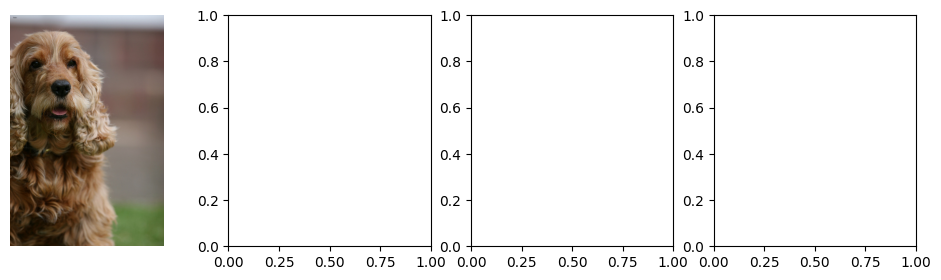

In [138]:
fig, axs = plt.subplots(1,4,figsize=(12,3));
for ax, sample in zip(axs.ravel(),dataloader):
    tensor, label = sample
    img = tensor2np(tensor)[0]
    label =  tensor2np(label)
    ax.imshow(img, cmap='gray'); 
    ax.axis('off')
    ax.set_title(dataset.class_names[label])

In [132]:
label

array([0])

In [71]:
##классы в наборе данных
dataset.class_names

{'english_cocker_spaniel': 0,
 'american_bulldog': 1,
 'pug': 2,
 'newfoundland': 3,
 'havanese': 4,
 'birman': 5,
 'english_setter': 6,
 'staffordshire_bull_terrier': 7,
 'shiba_inu': 8,
 'chihuahua': 9,
 'great_pyrenees': 10,
 'american_pit_bull_terrier': 11,
 'british_shorthair': 12,
 'scottish_terrier': 13,
 'sphynx': 14,
 'russian_blue': 15,
 'ragdoll': 16,
 'pomeranian': 17,
 'japanese_chin': 18,
 'wheaten_terrier': 19,
 'siamese': 20,
 'bombay': 21,
 'boxer': 22,
 'abyssinian': 23,
 'persian': 24,
 'yorkshire_terrier': 25,
 'maine_coon': 26,
 'samoyed': 27,
 'miniature_pinscher': 28,
 'keeshond': 29,
 'saint_bernard': 30,
 'basset_hound': 31,
 'egyptian_mau': 32,
 'german_shorthaired': 33,
 'bengal': 34,
 'beagle': 35,
 'leonberger': 36}